# Iris data Prediction

Implementation of a KNN classifier from scratch then using Cross Validation and Grid Search to improve the accuracy.

In [81]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [82]:
def knn_classifier(K,w):
    knn_classifier = KNeighborsClassifier(n_neighbors = K, metric = 'euclidean', weights=w)
    return knn_classifier

In [83]:
def KNN(K, Training_Set, Train_Set_Quality, Test_Set, Test_Set_Quality, w):
    weight = w
    classifier = knn_classifier(K,w)
    classifier.fit(Training_Set, Train_Set_Quality)
    y_predicted = classifier.predict(Test_Set)

    print ('Accuracy obtained with KNN: {0} %'.format(accuracy_score(Test_Set_Quality,y_predicted) * 100))

    return classifier

In [84]:
def Cross_Validation(classifier, Training_Set, Train_Set_Quality, cv):
    
    cv_scores = cross_val_score(classifier, Training_Set, Train_Set_Quality, cv=5)
    print ('Accuracy obtained after cross validation: {0} %'.format(np.mean(cv_scores) * 100))

In [85]:
def Grid_Search_CV(K1, K2, Training_Set, Train_Set_Quality, cv):
    
    classifier_2 = KNeighborsClassifier()
    param_grid = {"n_neighbors": np.arange(K1, K2)}
    knn_gscv = GridSearchCV(classifier_2, param_grid, cv=5)
    knn_gscv.fit(Training_Set, Train_Set_Quality)
    print ("Optimized K: ",knn_gscv.best_params_)
    print ("Accuracy obtained after GridSearchCV: {0} %".format(knn_gscv.best_score_ * 100))

In [86]:
def main():
    X,Y = load_iris(return_X_y=True)
    Training_Set, Test_Set, Train_Set_Quality, Test_Set_Quality = train_test_split(X,Y, test_size = 0.2, random_state=False)
    for w in ['uniform','distance']:
        print("When weight is : ",w)
        classifier = KNN(5, Training_Set, Train_Set_Quality, Test_Set, Test_Set_Quality,w)
        cv=5
        Cross_Validation(classifier, Training_Set, Train_Set_Quality, cv)
        K1 = 1
        K2 = 26
        Grid_Search_CV(K1, K2, Training_Set, Train_Set_Quality, cv)
        print("\n")
    
    
main()

When weight is :  uniform
Accuracy obtained with KNN: 96.66666666666667 %
Accuracy obtained after cross validation: 93.31515151515151 %
Optimized K:  {'n_neighbors': 12}
Accuracy obtained after GridSearchCV: 97.5 %


When weight is :  distance
Accuracy obtained with KNN: 100.0 %
Accuracy obtained after cross validation: 94.14848484848484 %
Optimized K:  {'n_neighbors': 12}
Accuracy obtained after GridSearchCV: 97.5 %




C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\vivek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


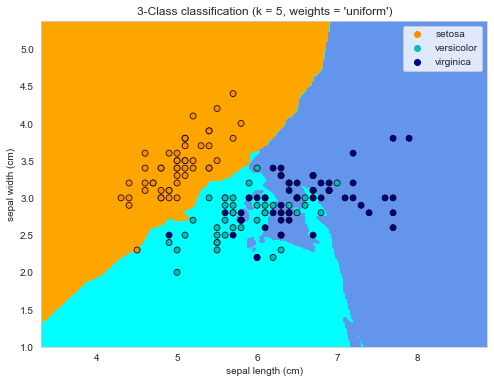

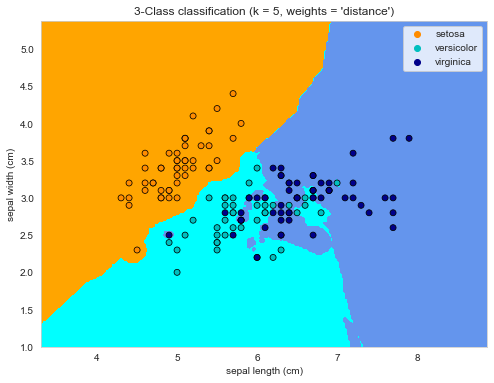

In [87]:
#reference from https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
n_neighbors = 5

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

<Figure size 432x288 with 0 Axes>

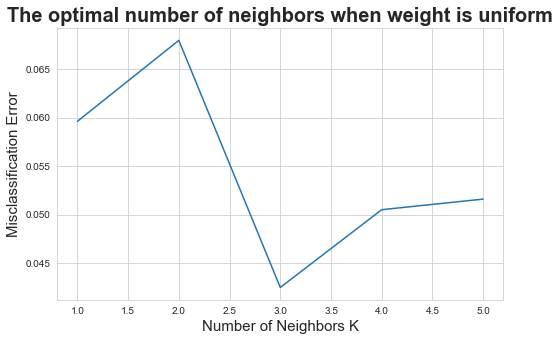

<Figure size 432x288 with 0 Axes>

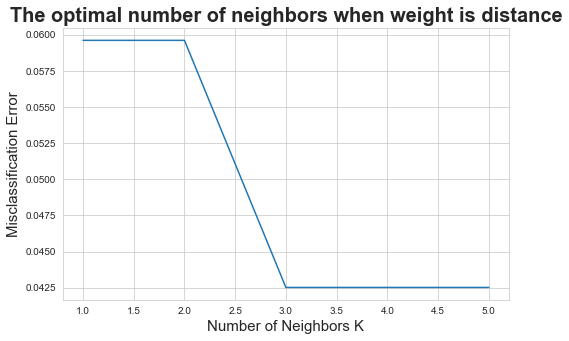

In [88]:
# creating list of K for KNN
k_list = list(range(1,6))
# creating list of cv scores
cv_scores = []
X,Y = load_iris(return_X_y=True)
Training_Set, Test_Set, Train_Set_Quality, Test_Set_Quality = train_test_split(X,Y, test_size = 0.2, random_state=True)
# perform 5-fold cross validation
for w in ['uniform','distance']:
    for k in k_list:
        knn = knn_classifier(k,w)
        scores = cross_val_score(knn, Training_Set, Train_Set_Quality, cv=5, scoring='accuracy')
        cv_scores.append(scores.mean())
        
    MSE = [1 - x for x in cv_scores]
    plt.figure()
    plt.figure(figsize=(8,5))
    plt.title('The optimal number of neighbors when weight is '+w, fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Misclassification Error', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, MSE)
    plt.show()
    cv_scores.clear()